# Classification




In [1]:
import pandas as pd
data = pd.read_csv('Planets.csv')
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 33796
Number of attributes = 24


,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,disc_facility,disc_telescope,disc_instrument,...,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist
0,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,326.03000,185.178779,17.793252,93.1846
1,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,NaN,185.178779,17.793252,93.1846
2,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,516.22000,229.274595,71.823943,125.3210
3,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,NaN,229.274595,71.823943,125.3210
4,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,516.21997,229.274595,71.823943,125.3210


In [2]:
import numpy as np

print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))
    

Number of instances = 33796
Number of attributes = 24
Number of missing values:
	pl_name: 0
	hostname: 0
	sy_snum: 0
	sy_pnum: 0
	sy_mnum: 0
	discoverymethod: 0
	disc_year: 0
	disc_facility: 0
	disc_telescope: 0
	disc_instrument: 0
	rv_flag: 0
	pul_flag: 0
	ptv_flag: 0
	tran_flag: 0
	ast_flag: 0
	obm_flag: 0
	micro_flag: 0
	etv_flag: 0
	ima_flag: 0
	dkin_flag: 0
	pl_orbper: 2871
	ra: 0
	dec: 0
	sy_dist: 800


In [3]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates(subset=['pl_name', 'hostname'])
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))
data.head()

Number of rows before discarding duplicates = 33796
Number of rows after discarding duplicates = 5220


,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,disc_facility,disc_telescope,disc_instrument,...,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist
0,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,326.03,185.178779,17.793252,93.1846
2,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,516.22,229.274595,71.823943,125.3210
5,14 And b,14 And,1,1,0,Radial Velocity,2008,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,...,0,0,0,0,0,0,185.84,352.824150,39.235837,75.4392
7,14 Her b,14 Her,1,2,0,Radial Velocity,2002,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,...,0,0,0,0,0,0,1796.40,242.602101,43.816362,17.9323
15,16 Cyg B b,16 Cyg B,3,1,0,Radial Velocity,1996,Multiple Observatories,Multiple Telescopes,Multiple Instruments,...,0,0,0,0,0,0,798.50,295.465642,50.516824,21.1397


In [4]:
display(data)

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,disc_facility,disc_telescope,disc_instrument,...,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist
0,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,326.0300,185.178779,17.793252,93.1846
2,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,...,0,0,0,0,0,0,516.2200,229.274595,71.823943,125.3210
5,14 And b,14 And,1,1,0,Radial Velocity,2008,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,...,0,0,0,0,0,0,185.8400,352.824150,39.235837,75.4392
7,14 Her b,14 Her,1,2,0,Radial Velocity,2002,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,...,0,0,0,0,0,0,1796.4000,242.602101,43.816362,17.9323
15,16 Cyg B b,16 Cyg B,3,1,0,Radial Velocity,1996,Multiple Observatories,Multiple Telescopes,Multiple Instruments,...,0,0,0,0,0,0,798.5000,295.465642,50.516824,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33774,ups And b,ups And,2,3,0,Radial Velocity,1996,Lick Observatory,3.0 m C. Donald Shane Telescope,Hamilton Echelle Spectrograph,...,0,1,0,0,0,0,4.6110,24.198353,41.403815,13.4054
33781,ups And c,ups And,2,3,0,Radial Velocity,1999,Multiple Observatories,Multiple Telescopes,Multiple Instruments,...,0,0,0,0,0,0,240.9402,24.198353,41.403815,13.4054
33787,ups And d,ups And,2,3,0,Radial Velocity,1999,Multiple Observatories,Multiple Telescopes,Multiple Instruments,...,0,0,0,0,0,0,1282.4100,24.198353,41.403815,13.4054
33793,ups Leo b,ups Leo,1,1,0,Radial Velocity,2021,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,...,0,0,0,0,0,0,385.2000,174.237219,-0.823564,52.5973


In [5]:
print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

Number of instances = 5220
Number of attributes = 24
Number of missing values:
	pl_name: 0
	hostname: 0
	sy_snum: 0
	sy_pnum: 0
	sy_mnum: 0
	discoverymethod: 0
	disc_year: 0
	disc_facility: 0
	disc_telescope: 0
	disc_instrument: 0
	rv_flag: 0
	pul_flag: 0
	ptv_flag: 0
	tran_flag: 0
	ast_flag: 0
	obm_flag: 0
	micro_flag: 0
	etv_flag: 0
	ima_flag: 0
	dkin_flag: 0
	pl_orbper: 457
	ra: 0
	dec: 0
	sy_dist: 122


In [6]:
print('Number of rows in original data = %d' % (data.shape[0]))

data = data.dropna()

print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original data = 5220
Number of rows after discarding missing values = 4663


In [7]:
data = data.reset_index()
data.head()

,index,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,disc_facility,disc_telescope,...,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist
0,0,11 Com b,11 Com,2,1,0,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,...,0,0,0,0,0,0,326.03,185.178779,17.793252,93.1846
1,2,11 UMi b,11 UMi,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,...,0,0,0,0,0,0,516.22,229.274595,71.823943,125.3210
2,5,14 And b,14 And,1,1,0,Radial Velocity,2008,Okayama Astrophysical Observatory,1.88 m Telescope,...,0,0,0,0,0,0,185.84,352.824150,39.235837,75.4392
3,7,14 Her b,14 Her,1,2,0,Radial Velocity,2002,W. M. Keck Observatory,10 m Keck I Telescope,...,0,0,0,0,0,0,1796.40,242.602101,43.816362,17.9323
4,15,16 Cyg B b,16 Cyg B,3,1,0,Radial Velocity,1996,Multiple Observatories,Multiple Telescopes,...,0,0,0,0,0,0,798.50,295.465642,50.516824,21.1397


# Decision tree Classification

In [8]:
from sklearn import tree


X = data.drop(['pl_name','hostname'],axis='columns')
Y = data['tran_flag']



Some attributes have string values which cannot be handled by the Decision Tree Classifier. And therefore, we convert these values into float and add them into the dataset

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_discoverymethod = LabelEncoder()
le_disc_facility   = LabelEncoder()
le_disc_telescope  = LabelEncoder()
le_disc_instrument = LabelEncoder()

In [11]:
X['le_discoverymethod'] = le_discoverymethod.fit_transform(X['discoverymethod'])
X['le_disc_facility'] = le_disc_facility.fit_transform(X['disc_facility'])
X['le_disc_telescope'] = le_disc_telescope.fit_transform(X['disc_telescope'])
X['le_disc_instrument'] = le_disc_telescope.fit_transform(X['disc_instrument'])
X.head()

,index,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,disc_facility,disc_telescope,disc_instrument,rv_flag,...,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist,le_discoverymethod,le_disc_facility,le_disc_telescope,le_disc_instrument
0,0,2,1,0,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1,...,0,0,326.03,185.178779,17.793252,93.1846,7,55,26,17
1,2,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,1,...,0,0,516.22,229.274595,71.823943,125.3210,7,46,24,17
2,5,1,1,0,Radial Velocity,2008,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,1,...,0,0,185.84,352.824150,39.235837,75.4392,7,36,20,32
3,7,1,2,0,Radial Velocity,2002,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,1,...,0,0,1796.40,242.602101,43.816362,17.9323,7,51,22,33
4,15,3,1,0,Radial Velocity,1996,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1,...,0,0,798.50,295.465642,50.516824,21.1397,7,32,58,43


The preceding commands will extract the predictor (X) and target class (Y) attributes from the dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'entropy' as impurity measure. Next, the classifier is trained on the labeled data using the fit() function. 

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

In [12]:
X= X.drop(['discoverymethod', 'disc_facility', 'disc_telescope', 'disc_instrument'], axis='columns')
X

,index,sy_snum,sy_pnum,sy_mnum,disc_year,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,...,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist,le_discoverymethod,le_disc_facility,le_disc_telescope,le_disc_instrument
0,0,2,1,0,2007,1,0,0,0,0,...,0,0,326.0300,185.178779,17.793252,93.1846,7,55,26,17
1,2,1,1,0,2009,1,0,0,0,0,...,0,0,516.2200,229.274595,71.823943,125.3210,7,46,24,17
2,5,1,1,0,2008,1,0,0,0,0,...,0,0,185.8400,352.824150,39.235837,75.4392,7,36,20,32
3,7,1,2,0,2002,1,0,0,0,0,...,0,0,1796.4000,242.602101,43.816362,17.9323,7,51,22,33
4,15,3,1,0,1996,1,0,0,0,0,...,0,0,798.5000,295.465642,50.516824,21.1397,7,32,58,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,33772,1,1,0,2013,1,0,0,0,0,...,0,0,305.5000,107.784723,30.244954,112.5370,7,27,7,34
4659,33774,2,3,0,1996,1,0,0,0,0,...,0,0,4.6110,24.198353,41.403815,13.4054,7,27,35,34
4660,33781,2,3,0,1999,1,0,0,0,0,...,0,0,240.9402,24.198353,41.403815,13.4054,7,32,58,43
4661,33787,2,3,0,1999,1,0,0,0,0,...,0,0,1282.4100,24.198353,41.403815,13.4054,7,32,58,43


Now, we split the data 70:30 for training and testing respectively.

In [13]:
data_test = X.drop(data.index[1398:])
data_test


,index,sy_snum,sy_pnum,sy_mnum,disc_year,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,...,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist,le_discoverymethod,le_disc_facility,le_disc_telescope,le_disc_instrument
0,0,2,1,0,2007,1,0,0,0,0,...,0,0,326.030000,185.178779,17.793252,93.1846,7,55,26,17
1,2,1,1,0,2009,1,0,0,0,0,...,0,0,516.220000,229.274595,71.823943,125.3210,7,46,24,17
2,5,1,1,0,2008,1,0,0,0,0,...,0,0,185.840000,352.824150,39.235837,75.4392,7,36,20,32
3,7,1,2,0,2002,1,0,0,0,0,...,0,0,1796.400000,242.602101,43.816362,17.9323,7,51,22,33
4,15,3,1,0,1996,1,0,0,0,0,...,0,0,798.500000,295.465642,50.516824,21.1397,7,32,58,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,4085,1,1,0,2018,1,0,0,1,0,...,0,0,11.168459,73.766793,18.654323,130.7200,8,17,9,39
1394,4088,1,3,0,2018,0,0,0,1,0,...,0,0,2.467460,230.479901,-20.231797,67.5062,8,17,9,39
1395,4090,1,3,0,2018,0,0,0,1,0,...,0,0,7.060050,230.479901,-20.231797,67.5062,8,17,9,39
1396,4092,1,3,0,2018,0,0,0,1,0,...,0,0,24.364500,230.479901,-20.231797,67.5062,8,17,9,39


In [14]:
temp = X.drop(data.index[:1398])
X = temp.drop(['tran_flag'],axis='columns')

Y = Y.drop(data.index[:1398])
X

,index,sy_snum,sy_pnum,sy_mnum,disc_year,rv_flag,pul_flag,ptv_flag,ast_flag,obm_flag,...,ima_flag,dkin_flag,pl_orbper,ra,dec,sy_dist,le_discoverymethod,le_disc_facility,le_disc_telescope,le_disc_instrument
1398,4101,1,1,0,2018,1,0,0,0,0,...,0,0,3.20466,347.704316,-7.857559,537.9630,8,17,9,39
1399,4103,1,3,0,2018,0,0,0,0,0,...,0,0,5.24000,160.594126,4.441375,31.0849,8,17,9,39
1400,4104,1,3,0,2018,0,0,0,0,0,...,0,0,7.77500,160.594126,4.441375,31.0849,8,17,9,39
1401,4105,1,3,0,2018,0,0,0,0,0,...,0,0,10.11500,160.594126,4.441375,31.0849,8,17,9,39
1402,4106,1,2,0,2016,1,0,0,0,0,...,0,0,20.88506,242.573456,-24.990603,170.5620,8,17,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,33772,1,1,0,2013,1,0,0,0,0,...,0,0,305.50000,107.784723,30.244954,112.5370,7,27,7,34
4659,33774,2,3,0,1996,1,0,0,0,1,...,0,0,4.61100,24.198353,41.403815,13.4054,7,27,35,34
4660,33781,2,3,0,1999,1,0,0,0,0,...,0,0,240.94020,24.198353,41.403815,13.4054,7,32,58,43
4661,33787,2,3,0,1999,1,0,0,0,0,...,0,0,1282.41000,24.198353,41.403815,13.4054,7,32,58,43


Now we use the X, Y to train the model so plot the decision tree as a result of the training. We use 70% of the data for the training

In [15]:
clf = tree.DecisionTreeClassifier(criterion ='entropy')

In [16]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.9, 'x[18] <= 7.5\nentropy = 0.266\nsamples = 3265\nvalue = [148, 3117]'),
 Text(0.3, 0.7, 'x[14] <= 1.623\nentropy = 0.062\nsamples = 137\nvalue = [136, 1]'),
 Text(0.2, 0.5, 'x[14] <= 1.178\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.5, 'entropy = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(0.7, 0.7, 'x[18] <= 8.5\nentropy = 0.036\nsamples = 3128\nvalue = [12, 3116]'),
 Text(0.6, 0.5, 'entropy = 0.0\nsamples = 3106\nvalue = [0, 3106]'),
 Text(0.8, 0.5, 'x[4] <= 2015.0\nentropy = 0.994\nsamples = 22\nvalue = [12, 10]'),
 Text(0.7, 0.3, 'x[14] <= 54.266\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]')]

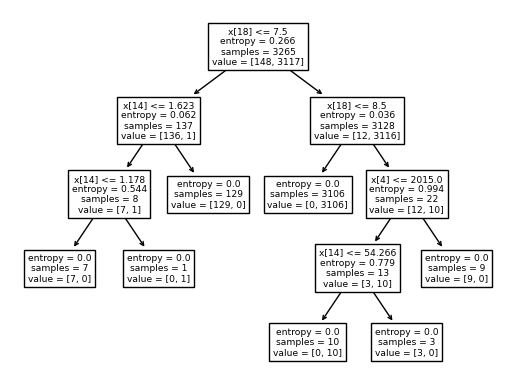

In [17]:
tree.plot_tree(clf)

In [18]:
clf.score(X, Y)

1.0

We use the test data set to predict the values of tran_flag based on the decision tree 

In [19]:
testY = data_test['tran_flag']
testX = data_test.drop(['tran_flag'],axis=1)


In [20]:
predY = clf.predict(testX)
predictions = pd.concat([data_test['index'],pd.Series(predY,name='Predicted tran_flag')], axis=1)
predictions

,index,Predicted tran_flag
0,0,0
1,2,0
2,5,0
3,7,0
4,15,0
...,...,...
1393,4085,1
1394,4088,1
1395,4090,1
1396,4092,1


In [21]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.98


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY, predY, labels = [0,1])

array([[896,   2],
       [ 19, 481]])

In [23]:
from sklearn.metrics import recall_score
recall_score(testY, predY)


0.962

In [24]:
from sklearn.metrics import precision_score
precision_score(testY, predY)

0.9958592132505176

Here we plot the ROC curve which shows the FPR and TPR for the classification

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [26]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
    plt.xlabel("False Positive rate (precision)")
    plt.ylabel("True Positive rate (precision)")
    plt.title ("Receiver Operating Characteristic Curve (ROC)")
    plt.legend()
    plt.show()


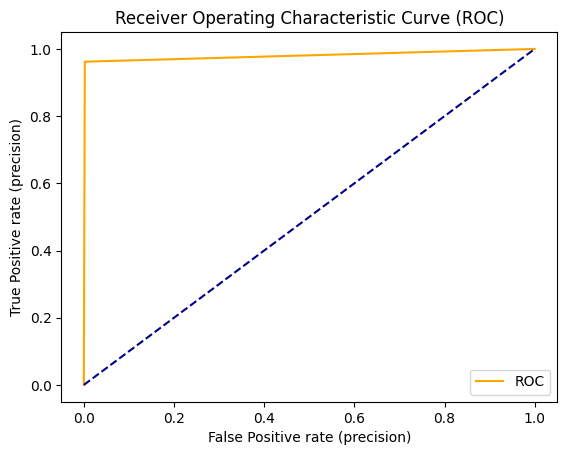

In [27]:
pred = clf.predict_proba(testX)
pred = pred[:,1]

fpr, tpr, _ = roc_curve(testY, pred)
plot_roc_curve(fpr, tpr)
